In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [59]:
Stardate=datetime(2005, 1, 1)
Enddate=datetime(2011, 12, 31)
tck_DJ_data = yf.download('^DJI', Stardate-timedelta(weeks=1),Enddate)
Close_DJ_data=pd.DataFrame(tck_DJ_data['Close'])


[*********************100%***********************]  1 of 1 completed


In [60]:
Close_DJ_data=  Close_DJ_data.reset_index()
Close_DJ_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [61]:
Close_DJ_data

,Date,Close
0,2004-12-27,10776.129883
1,2004-12-28,10854.540039
2,2004-12-29,10829.190430
3,2004-12-30,10800.299805
4,2004-12-31,10783.009766
...,...,...
1763,2011-12-23,12294.000000
1764,2011-12-27,12291.349609
1765,2011-12-28,12151.410156
1766,2011-12-29,12287.040039


In [62]:
Close_DJ_data = (Close_DJ_data.set_index('Date')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [63]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ', parse_dates =[0,1,100,101] )


In [64]:
df_gt=pd.DataFrame({'GoogleWE':paper['Google End Date'],'debt':paper['debt'].astype(np.float64),\
    'DJIADate':paper['DJIA Date'],'DJIAClose':paper['DJIA Closing Price'].astype(np.float64)})


In [65]:
df_gt = (df_gt.set_index('GoogleWE')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['GoogleWE'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [66]:
df_gt.head()

,GoogleWE,debt,DJIADate,DJIAClose
0,2004-12-25,0.133333,2004-12-27,10776.13
1,2004-12-26,0.133333,2004-12-27,10776.13
2,2004-12-27,0.133333,2004-12-27,10776.13
3,2004-12-28,0.133333,2004-12-27,10776.13
4,2004-12-29,0.133333,2004-12-27,10776.13


In [67]:
df_gt.dtypes

GoogleWE     datetime64[ns]
debt                float64
DJIADate     datetime64[ns]
DJIAClose           float64
dtype: object

In [68]:
Cnsl_db = pd.merge(Close_DJ_data, df_gt, how='inner', left_on = 'Date', right_on='GoogleWE')
Cnsl_db=Cnsl_db.loc[Cnsl_db['Date']>=Stardate+timedelta(days=2)]
Cnsl_db.head(5)

,Date,Close,GoogleWE,debt,DJIADate,DJIAClose
7,2005-01-03,10729.429688,2005-01-03,0.16,2005-01-03,10729.43
8,2005-01-04,10630.780273,2005-01-04,0.16,2005-01-03,10729.43
9,2005-01-05,10597.830078,2005-01-05,0.16,2005-01-03,10729.43
10,2005-01-06,10622.879883,2005-01-06,0.16,2005-01-03,10729.43
11,2005-01-07,10603.959961,2005-01-07,0.16,2005-01-03,10729.43


In [69]:
Cnsl_db2 = (Cnsl_db.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

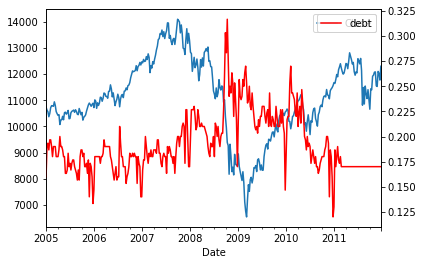

In [70]:
ax = Cnsl_db2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db2.plot('Date','debt',ax=ax1, color='r')

In [71]:
Google_trends=pd.read_csv('debt_google_trend.csv')
Google_trends['Mes']=Google_trends['Mes'].astype('datetime64[ns]')

In [72]:
Google_trends = (Google_trends.set_index('Mes')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Mes'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [73]:
Cnsl_db_Gtr = pd.merge(Close_DJ_data, Google_trends, how='inner', left_on = 'Date', right_on='Mes')
Cnsl_db_Gtr=Cnsl_db_Gtr.loc[Cnsl_db_Gtr['Date']>=Stardate+timedelta(days=2)]

In [74]:
Cnsl_db_Gtr2 = (Cnsl_db_Gtr.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

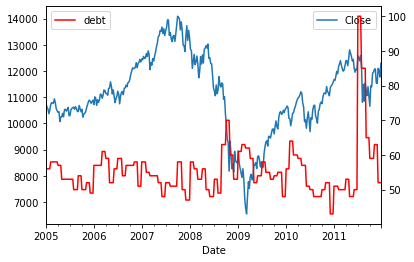

In [75]:
ax = Cnsl_db_Gtr2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db_Gtr2.plot('Date','debt',ax=ax1, color='r')

In [76]:
try:
    del StrategyDataframe
    StrategyDataframe=Cnsl_db_Gtr2.copy()
except:
    StrategyDataframe=Cnsl_db_Gtr2.copy()
StrategyDataframe['DJRet']=StrategyDataframe['Close']/StrategyDataframe['Close'].shift(1)-1
StrategyDataframe['MovAvg']=StrategyDataframe['debt'].rolling(3).mean()
StrategyDataframe['MovAvg']=StrategyDataframe['MovAvg'].shift(1)
StrategyDataframe.head(10)

,Date,Close,Mes,debt,DJRet,MovAvg
0,2005-01-03,10729.429688,2005-01-03,56.0,NaN,NaN
1,2005-01-10,10621.030273,2005-01-10,56.0,-0.010103,NaN
2,2005-01-17,10558.000000,2005-01-17,56.0,-0.005934,NaN
3,2005-01-24,10368.610352,2005-01-24,56.0,-0.017938,56.000000
4,2005-01-31,10489.940430,2005-01-31,56.0,0.011702,56.000000
5,2005-02-07,10715.759766,2005-02-07,58.0,0.021527,56.000000
6,2005-02-14,10791.129883,2005-02-14,58.0,0.007034,56.666667
7,2005-02-21,10785.219727,2005-02-21,58.0,-0.000548,57.333333
8,2005-02-28,10766.230469,2005-02-28,58.0,-0.001761,58.000000
9,2005-03-07,10936.860352,2005-03-07,58.0,0.015849,58.000000


In [77]:
StrategyDataframe['Signal']=np.sign(StrategyDataframe['MovAvg']-StrategyDataframe['debt'])
StrategyDataframe['Signal']=StrategyDataframe['Signal'].shift(1)
StrategyDataframe['Signal']=StrategyDataframe['Signal'].replace(to_replace=0, method='ffill')
StrategyDataframe['SRet']=StrategyDataframe['Signal']*StrategyDataframe['DJRet']
StrategyDataframe['DJCumRet']=(1+StrategyDataframe['DJRet'] ).cumprod()
StrategyDataframe['SCumRet']=(1+StrategyDataframe['SRet'] ).cumprod()
StrategyDataframe['DJCumRet']=StrategyDataframe['DJCumRet'].fillna(1)
StrategyDataframe['SCumRet']=StrategyDataframe['SCumRet'].fillna(1)
StrategyDataframe['DJCumRet']=StrategyDataframe['DJCumRet']-1
StrategyDataframe['SCumRet']=StrategyDataframe['SCumRet']-1
StrategyDataframe.head(10)

,Date,Close,Mes,debt,DJRet,MovAvg,Signal,SRet,DJCumRet,SCumRet
0,2005-01-03,10729.429688,2005-01-03,56.0,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2005-01-10,10621.030273,2005-01-10,56.0,-0.010103,NaN,NaN,NaN,-0.010103,0.000000
2,2005-01-17,10558.000000,2005-01-17,56.0,-0.005934,NaN,NaN,NaN,-0.015978,0.000000
3,2005-01-24,10368.610352,2005-01-24,56.0,-0.017938,56.000000,NaN,NaN,-0.033629,0.000000
4,2005-01-31,10489.940430,2005-01-31,56.0,0.011702,56.000000,NaN,NaN,-0.022321,0.000000
5,2005-02-07,10715.759766,2005-02-07,58.0,0.021527,56.000000,NaN,NaN,-0.001274,0.000000
6,2005-02-14,10791.129883,2005-02-14,58.0,0.007034,56.666667,-1.0,-0.007034,0.005751,-0.007034
7,2005-02-21,10785.219727,2005-02-21,58.0,-0.000548,57.333333,-1.0,0.000548,0.005200,-0.006490
8,2005-02-28,10766.230469,2005-02-28,58.0,-0.001761,58.000000,-1.0,0.001761,0.003430,-0.004740
9,2005-03-07,10936.860352,2005-03-07,58.0,0.015849,58.000000,-1.0,-0.015849,0.019333,-0.020514


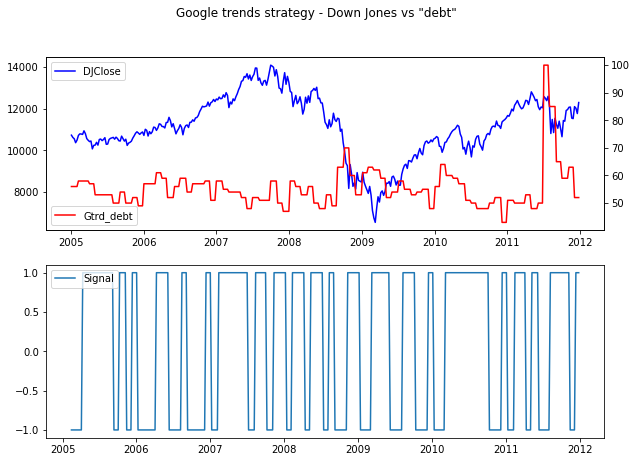

In [78]:
fig, axs = plt.subplots(2,figsize=(10,7))
fig
fig.suptitle('Google trends strategy - Down Jones vs "debt"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe['Date'], StrategyDataframe['Close'], color='blue',label='DJClose') 
axs0.plot(StrategyDataframe['Date'], StrategyDataframe['debt'], color='red',label='Gtrd_debt')
axs[1].plot(StrategyDataframe['Date'],StrategyDataframe['Signal'],label='Signal')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')


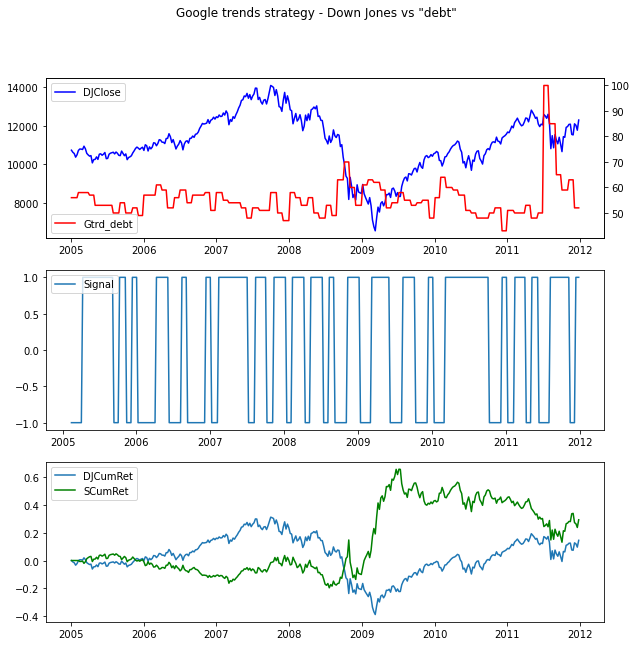

In [79]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig
fig.suptitle('Google trends strategy - Down Jones vs "debt"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe['Date'], StrategyDataframe['Close'],color='blue',label='DJClose') 
axs0.plot(StrategyDataframe['Date'], StrategyDataframe['debt'],color='red',label='Gtrd_debt')
axs[1].plot(StrategyDataframe['Date'],StrategyDataframe['Signal'],label='Signal')
axs[2].plot(StrategyDataframe['Date'],StrategyDataframe['DJCumRet'],label='DJCumRet')
axs[2].plot(StrategyDataframe['Date'],StrategyDataframe['SCumRet'],color='green',label='SCumRet')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')


In [24]:
StrategyDataframe.tail(10)

,Date,Close,Mes,debt,DJRet,MovAvg,Signal,SRet,DJCumRet,SCumRet
355,2011-10-24,11913.620117,2011-10-24,59.0,0.045329,59.000000,1.0,0.045329,0.110368,0.265748
356,2011-10-31,11955.009766,2011-10-31,59.0,0.003474,59.000000,1.0,0.003474,0.114226,0.270145
357,2011-11-07,12068.389648,2011-11-07,63.0,0.009484,59.000000,1.0,0.009484,0.124793,0.282191
358,2011-11-14,12078.980469,2011-11-14,63.0,0.000878,60.333333,-1.0,-0.000878,0.125780,0.281066
359,2011-11-21,11547.309570,2011-11-21,63.0,-0.044016,61.666667,-1.0,0.044016,0.076228,0.337454
360,2011-11-28,11523.009766,2011-11-28,63.0,-0.002104,63.000000,-1.0,0.002104,0.073963,0.340268
361,2011-12-05,12097.830078,2011-12-05,52.0,0.049885,63.000000,-1.0,-0.049885,0.127537,0.273410
362,2011-12-12,12021.389648,2011-12-12,52.0,-0.006319,59.333333,1.0,-0.006319,0.120413,0.265364
363,2011-12-19,11766.259766,2011-12-19,52.0,-0.021223,55.666667,1.0,-0.021223,0.096634,0.238509
364,2011-12-26,12294.000000,2011-12-26,52.0,0.044852,52.000000,1.0,0.044852,0.145820,0.294058


### increase rates

In [25]:
Stardate2=datetime(2020, 1, 1)
Enddate2=datetime(2022, 10, 1)

tck_DJ_data2 = yf.download('^GSPC', Stardate2-timedelta(weeks=1),Enddate2)
Close_DJ_data2=pd.DataFrame(tck_DJ_data2['Close'])
Close_DJ_data2=  Close_DJ_data2.reset_index()

[*********************100%***********************]  1 of 1 completed


In [26]:
Close_DJ_data2 = (Close_DJ_data2.set_index('Date')
      .reindex(pd.date_range(Stardate2-timedelta(weeks=1), Enddate2, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [27]:
Google_trends2=pd.read_csv('Gtrend_increase_rates.csv',parse_dates=['Mes'], dayfirst=True)

In [28]:
Google_trends2 = (Google_trends2.set_index('Mes')
      .reindex(pd.date_range(Stardate2-timedelta(weeks=1), Enddate2, freq='D'))
      .rename_axis(['Mes'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [29]:
Cnsl_db_IRSP = pd.merge(Close_DJ_data2, Google_trends2, how='inner', left_on = 'Date', right_on='Mes')

In [30]:
Cnsl_db_IRSP2 = (Cnsl_db_IRSP.set_index('Date')
      .reindex(pd.date_range(Stardate2+timedelta(days=2), Enddate2, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

In [31]:
try:
    del StrategyDataframe2
    StrategyDataframe2=Cnsl_db_IRSP2.copy()
except:
    StrategyDataframe2=Cnsl_db_IRSP2.copy()
StrategyDataframe2['SPRet']=StrategyDataframe2['Close']/StrategyDataframe2['Close'].shift(1)-1
StrategyDataframe2['MovAvg']=StrategyDataframe2['debt'].rolling(3).mean()
StrategyDataframe2['MovAvg']=StrategyDataframe2['MovAvg'].shift(1)
StrategyDataframe2.head(10)

,Date,Close,Mes,debt,SPRet,MovAvg
0,2020-01-06,3246.280029,2020-01-06,16.0,NaN,NaN
1,2020-01-13,3288.129883,2020-01-13,22.0,0.012892,NaN
2,2020-01-20,3329.620117,2020-01-20,17.0,0.012618,NaN
3,2020-01-27,3243.629883,2020-01-27,29.0,-0.025826,18.333333
4,2020-02-03,3248.919922,2020-02-03,26.0,0.001631,22.666667
5,2020-02-10,3352.090088,2020-02-10,28.0,0.031755,24.000000
6,2020-02-17,3380.159912,2020-02-17,30.0,0.008374,27.666667
7,2020-02-24,3225.889893,2020-02-24,37.0,-0.045640,28.000000
8,2020-03-02,3090.229980,2020-03-02,33.0,-0.042053,31.666667
9,2020-03-09,2746.560059,2020-03-09,31.0,-0.111212,33.333333


In [32]:
StrategyDataframe2['Signal']=np.sign(StrategyDataframe2['MovAvg']-StrategyDataframe2['debt'])
StrategyDataframe2['Signal']=StrategyDataframe2['Signal'].shift(1)
StrategyDataframe2['Signal']=StrategyDataframe2['Signal'].replace(to_replace=0, method='ffill')
StrategyDataframe2['SRet']=StrategyDataframe2['Signal']*StrategyDataframe2['SPRet']
StrategyDataframe2['SPCumRet']=(1+StrategyDataframe2['SPRet'] ).cumprod()
StrategyDataframe2['SCumRet']=(1+StrategyDataframe2['SRet'] ).cumprod()
StrategyDataframe2['SPCumRet']=StrategyDataframe2['SPCumRet'].fillna(1)
StrategyDataframe2['SCumRet']=StrategyDataframe2['SCumRet'].fillna(1)
StrategyDataframe2['SPCumRet']=StrategyDataframe2['SPCumRet']-1
StrategyDataframe2['SCumRet']=StrategyDataframe2['SCumRet']-1 
StrategyDataframe2.head(10)

,Date,Close,Mes,debt,SPRet,MovAvg,Signal,SRet,SPCumRet,SCumRet
0,2020-01-06,3246.280029,2020-01-06,16.0,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2020-01-13,3288.129883,2020-01-13,22.0,0.012892,NaN,NaN,NaN,0.012892,0.000000
2,2020-01-20,3329.620117,2020-01-20,17.0,0.012618,NaN,NaN,NaN,0.025672,0.000000
3,2020-01-27,3243.629883,2020-01-27,29.0,-0.025826,18.333333,NaN,NaN,-0.000816,0.000000
4,2020-02-03,3248.919922,2020-02-03,26.0,0.001631,22.666667,-1.0,-0.001631,0.000813,-0.001631
5,2020-02-10,3352.090088,2020-02-10,28.0,0.031755,24.000000,-1.0,-0.031755,0.032594,-0.033334
6,2020-02-17,3380.159912,2020-02-17,30.0,0.008374,27.666667,-1.0,-0.008374,0.041241,-0.041429
7,2020-02-24,3225.889893,2020-02-24,37.0,-0.045640,28.000000,-1.0,0.045640,-0.006281,0.002320
8,2020-03-02,3090.229980,2020-03-02,33.0,-0.042053,31.666667,-1.0,0.042053,-0.048070,0.044471
9,2020-03-09,2746.560059,2020-03-09,31.0,-0.111212,33.333333,-1.0,0.111212,-0.153936,0.160629


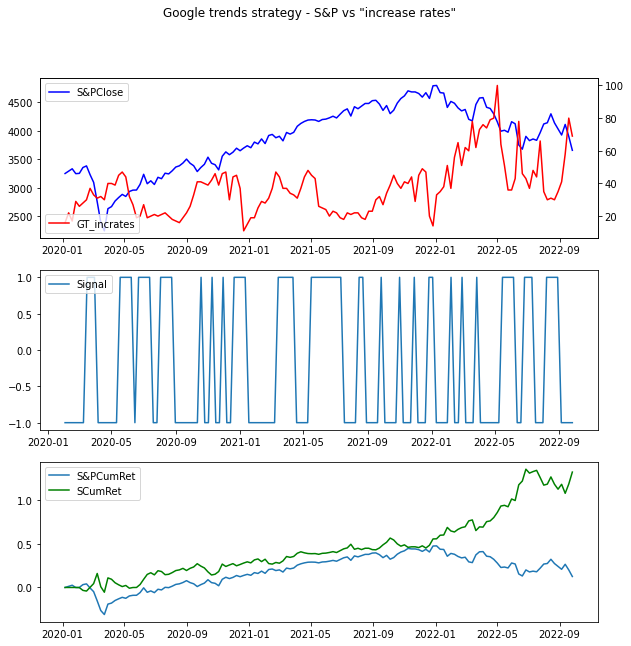

In [33]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig
fig.suptitle('Google trends strategy - S&P vs "increase rates"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe2['Date'], StrategyDataframe2['Close'],color='blue',label='S&PClose') 
axs0.plot(StrategyDataframe2['Date'], StrategyDataframe2['debt'],color='red',label='GT_incrates')
axs[1].plot(StrategyDataframe2['Date'],StrategyDataframe2['Signal'],label='Signal')
axs[2].plot(StrategyDataframe2['Date'],StrategyDataframe2['SPCumRet'],label='S&PCumRet')
axs[2].plot(StrategyDataframe2['Date'],StrategyDataframe2['SCumRet'],color='green',label='SCumRet')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

#### Downloading DJ for replicating - not used

In [90]:
Stardate3=datetime(2004, 1, 10)
Enddate3=datetime(2011, 2, 26)

tck_DJ_data3 = yf.download('^GSPC', Stardate3-timedelta(weeks=1),Enddate3)
Close_DJ_data3=pd.DataFrame(tck_DJ_data3['Close'])
Close_DJ_data3=Close_DJ_data3.reset_index()

[*********************100%***********************]  1 of 1 completed


In [91]:
Close_DJ_data3 = (Close_DJ_data3.set_index('Date')
      .reindex(pd.date_range(Stardate3-timedelta(weeks=1), Enddate3, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [92]:
df_gt=pd.DataFrame({'GoogleWE':paper['Google End Date'],'debt':paper['debt'].astype(np.float64),\
    'DJIADate':paper['DJIA Date'],'DJIAClose':paper['DJIA Closing Price'].astype(np.float64)})


In [93]:
df_gt = (df_gt.set_index('GoogleWE')
      .reindex(pd.date_range(Stardate3-timedelta(weeks=1), Enddate3, freq='D'))
      .rename_axis(['GoogleWE'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [102]:
StrategyDataframe3 = pd.merge(Close_DJ_data3, df_gt, how='inner', left_on = 'Date', right_on='GoogleWE')
#StrategyDataframe3=StrategyDataframe3.drop(columns=['GoogleWE', 'DJIADate','10485.18'])
StrategyDataframe3 = (StrategyDataframe3.set_index('Date')
      .reindex(pd.date_range(Stardate3+timedelta(days=2), Enddate3, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())
StrategyDataframe3

,Date,Close,GoogleWE,debt,DJIADate,DJIAClose
0,2004-01-12,1127.229980,2004-01-12,0.210000,2004-01-12,10485.18
1,2004-01-19,1139.829956,2004-01-19,0.210000,2004-01-20,10528.66
2,2004-01-26,1155.369995,2004-01-26,0.210000,2004-01-26,10702.51
3,2004-02-02,1135.260010,2004-02-02,0.213333,2004-02-02,10499.18
4,2004-02-09,1139.810059,2004-02-09,0.200000,2004-02-09,10579.03
...,...,...,...,...,...,...
367,2011-01-24,1290.839966,2011-01-24,0.180000,2011-01-24,11980.52
368,2011-01-31,1286.119995,2011-01-31,0.190000,2011-01-31,11891.93
369,2011-02-07,1319.050049,2011-02-07,0.176667,2011-02-07,12161.63
370,2011-02-14,1332.319946,2011-02-14,0.173333,2011-02-14,12268.19


#### Executing strategy with paper data

In [115]:
StrategyDataframe3=pd.DataFrame()
StrategyDataframe3['Date']=df_gt['GoogleWE']
StrategyDataframe3['Close']=df_gt['DJIAClose']
StrategyDataframe3['Mes']=df_gt['GoogleWE']
StrategyDataframe3['debt']=df_gt['debt']
StrategyDataframe3 = (StrategyDataframe3.set_index('Date')
      .reindex(pd.date_range(Stardate3+timedelta(days=2), Enddate3, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())
#StrategyDataframe3

In [116]:
StrategyDataframe3['DJRet']=StrategyDataframe3['Close']/StrategyDataframe3['Close'].shift(1)-1
StrategyDataframe3['MovAvg']=StrategyDataframe3['debt'].rolling(3).mean()
StrategyDataframe3['MovAvg']=StrategyDataframe3['MovAvg'].shift(1)
#StrategyDataframe3.head(10)

In [117]:
StrategyDataframe3['Signal']=np.sign(StrategyDataframe3['MovAvg']-StrategyDataframe3['debt'])
StrategyDataframe3['Signal']=StrategyDataframe3['Signal'].shift(1)
StrategyDataframe3['Signal']=StrategyDataframe3['Signal'].replace(to_replace=0, method='ffill')
StrategyDataframe3['SRet']=StrategyDataframe3['Signal']*StrategyDataframe3['DJRet']
StrategyDataframe3['DJCumRet']=(1+StrategyDataframe3['DJRet'] ).cumprod()
StrategyDataframe3['SCumRet']=(1+StrategyDataframe3['SRet'] ).cumprod()
StrategyDataframe3['DJCumRet']=StrategyDataframe3['DJCumRet'].fillna(1)
StrategyDataframe3['SCumRet']=StrategyDataframe3['SCumRet'].fillna(1)
StrategyDataframe3['DJCumRet']=StrategyDataframe3['DJCumRet']-1
StrategyDataframe3['SCumRet']=StrategyDataframe3['SCumRet']-1
#StrategyDataframe3.head(10)

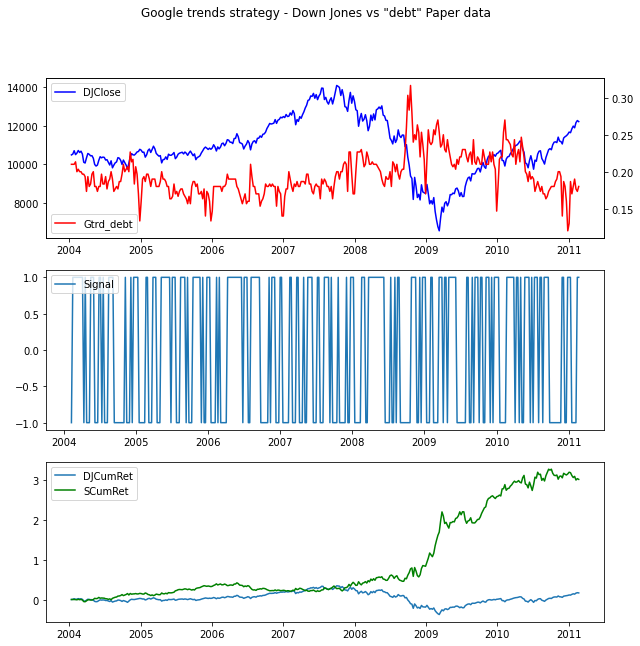

In [119]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig
fig.suptitle('Google trends strategy - Down Jones vs "debt" Paper data')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe3['Date'], StrategyDataframe3['Close'],color='blue',label='DJClose') 
axs0.plot(StrategyDataframe3['Date'], StrategyDataframe3['debt'],color='red',label='Gtrd_debt')
axs[1].plot(StrategyDataframe3['Date'],StrategyDataframe3['Signal'],label='Signal')
axs[2].plot(StrategyDataframe3['Date'],StrategyDataframe3['DJCumRet'],label='DJCumRet')
axs[2].plot(StrategyDataframe3['Date'],StrategyDataframe3['SCumRet'],color='green',label='SCumRet')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

In [114]:
StrategyDataframe3.tail(10)

,Date,Close,Mes,debt,DJRet,MovAvg,Signal,SRet,DJCumRet,SCumRet
362,2010-12-20,11478.13,2010-12-20,0.160000,0.004337,0.168889,-1.0,-0.004337,0.094700,3.113648
363,2010-12-27,11555.03,2010-12-27,0.120000,0.006700,0.175556,1.0,0.006700,0.102034,3.141209
364,2011-01-03,11670.75,2011-01-03,0.130000,0.010015,0.153333,1.0,0.010015,0.113071,3.182682
365,2011-01-10,11637.45,2011-01-10,0.186667,-0.002853,0.136667,1.0,-0.002853,0.109895,3.170747
366,2011-01-17,11837.93,2011-01-17,0.170000,0.017227,0.145556,-1.0,-0.017227,0.129015,3.098897
367,2011-01-24,11980.52,2011-01-24,0.180000,0.012045,0.162222,-1.0,-0.012045,0.142615,3.049525
368,2011-01-31,11891.93,2011-01-31,0.190000,-0.007395,0.178889,-1.0,0.007395,0.134166,3.079469
369,2011-02-07,12161.63,2011-02-07,0.176667,0.022679,0.180000,-1.0,-0.022679,0.159888,2.986950
370,2011-02-14,12268.19,2011-02-14,0.173333,0.008762,0.182222,1.0,0.008762,0.170050,3.021884
371,2011-02-21,12212.79,2011-02-21,0.180000,-0.004516,0.180000,1.0,-0.004516,0.164767,3.003722
